In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
df = pd.read_csv('/content/Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df['Embarked'] = df['Embarked'].replace({'S': '0', 'C': '1','Q':'2'})
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,1


In [ ]:
df['Sex'] = df['Sex'].replace({'male':'0','female':'1'})
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,1


In [ ]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",0,NaN,NaN,NaN,347082,NaN,B96 B98,0
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
sex_counts=df['Sex'].value_counts()
sex_counts

Sex
0    577
1    314
Name: count, dtype: int64

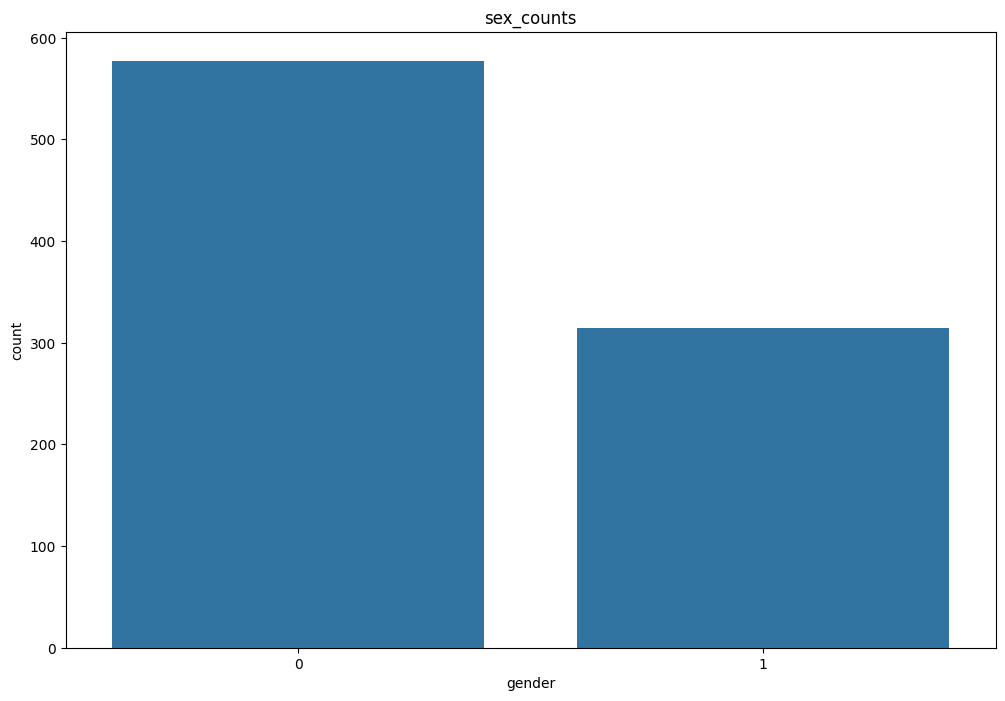

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
sns.barplot(x=sex_counts.index,y=sex_counts.values)
plt.title('sex_counts')
plt.xlabel('gender')
plt.ylabel('count')
plt.show()

In [ ]:
pclass_counts=df['Pclass'].value_counts()
pclass_counts

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

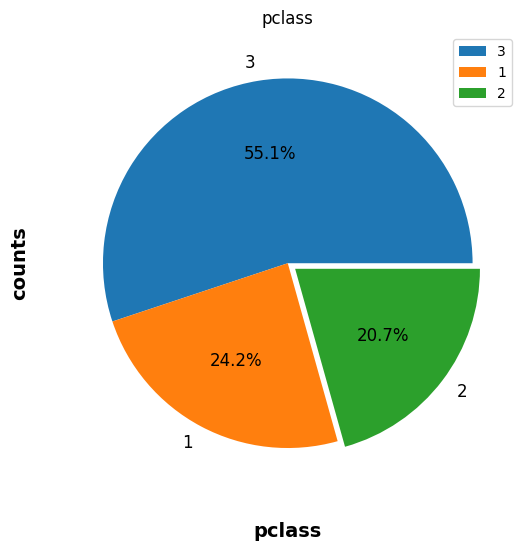

In [ ]:
plt.figure(figsize = (20, 6))
explode = (0,0,0.05)
pclass_counts.plot(kind = 'pie', fontsize = 12, explode = explode, autopct = '%.1f%%')
plt.title('pclass')
plt.xlabel('pclass', weight = "bold",fontsize = 14, labelpad = 20)
plt.ylabel('counts', weight = "bold",fontsize = 14, labelpad = 20)
plt.legend(labels = pclass_counts.index, loc = "best")
plt.show()

In [ ]:
Embarked_counts=df['Embarked'].value_counts()
Embarked_counts

Embarked
0    644
1    168
2     77
Name: count, dtype: int64

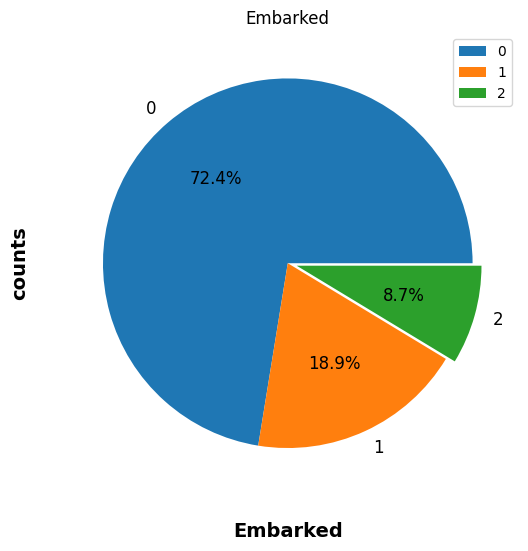

In [ ]:
plt.figure(figsize = (20, 6))
explode = (0,0,0.05)
Embarked_counts.plot(kind = 'pie', fontsize = 12, explode = explode, autopct = '%.1f%%')
plt.title('Embarked')
plt.xlabel('Embarked', weight = "bold",fontsize = 14, labelpad = 20)
plt.ylabel('counts', weight = "bold",fontsize = 14, labelpad = 20)
plt.legend(labels = Embarked_counts.index, loc = "best")
plt.show()

In [ ]:
target = 'Survived'
labels = ['Not-Survived','Survived']
features = [i for i in df.columns.values if i not in [target]]

original_df = df.copy(deep=True)
display(df.head())

print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0



Inference: The Datset consists of 12 features & 891 samples.


In [ ]:
Survived_counts=df['Survived'].value_counts()
Survived_counts

Survived
0    549
1    342
Name: count, dtype: int64

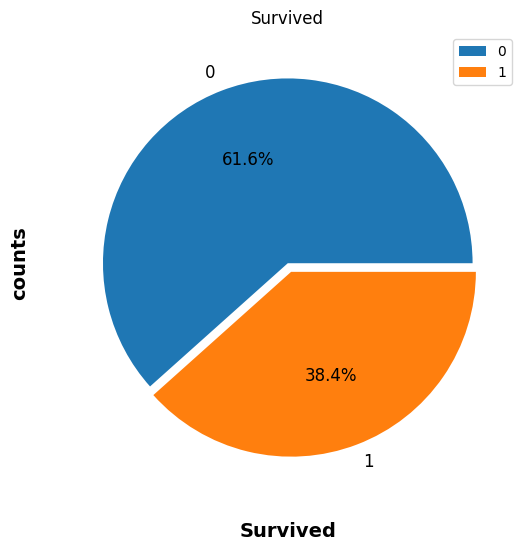

In [ ]:
plt.figure(figsize = (20, 6))
explode = (0,0.05)
Survived_counts.plot(kind = 'pie', fontsize = 12, explode = explode, autopct = '%.1f%%')
plt.title('Survived')
plt.xlabel('Survived', weight = "bold",fontsize = 14, labelpad = 20)
plt.ylabel('counts', weight = "bold",fontsize = 14, labelpad = 20)
plt.legend(labels = Survived_counts.index, loc = "best")
plt.show()

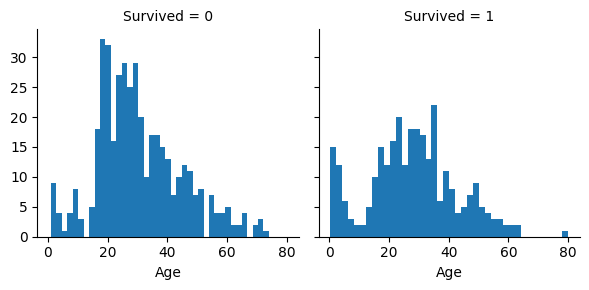

In [ ]:
age=sns.FacetGrid(df,col='Survived')
age.map(plt.hist,'Age',bins=40)

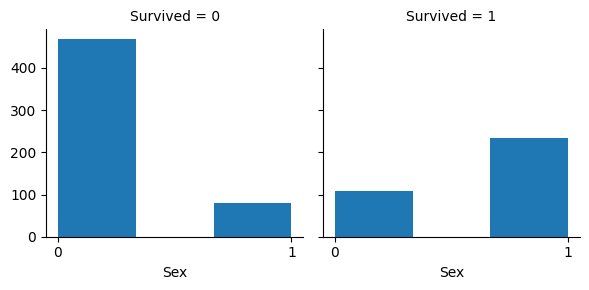

In [ ]:
gender=sns.FacetGrid(df,col='Survived')

gender.map(plt.hist,'Sex',bins=3)

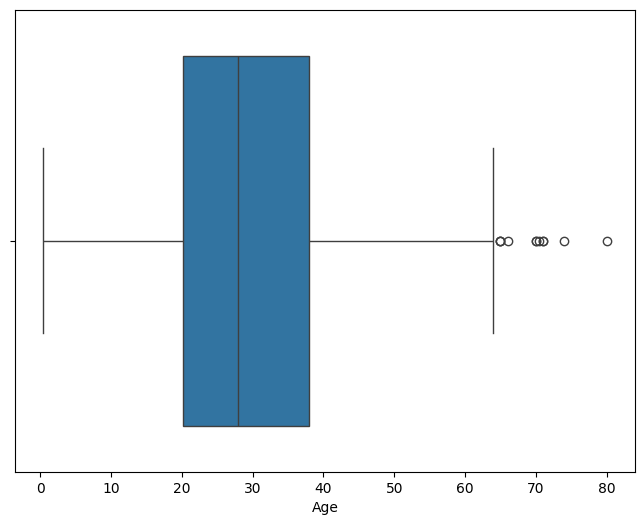

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=df["Age"])
plt.show()

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,1


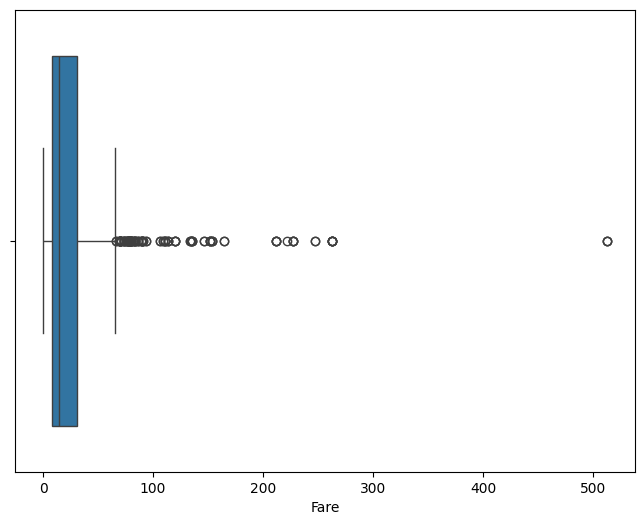

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=df["Fare"])
plt.show()

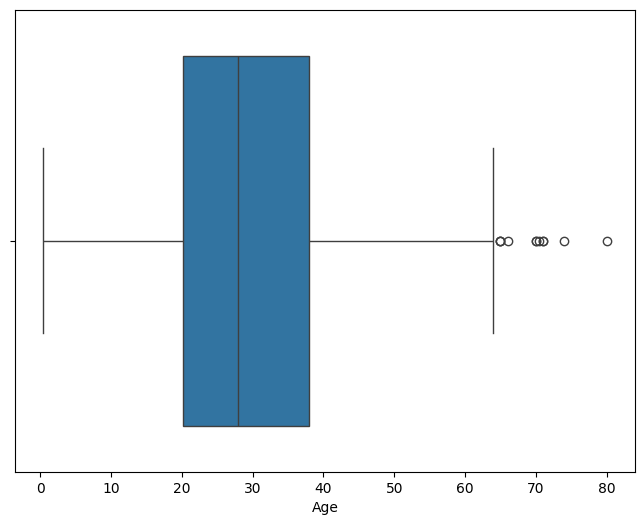

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=df["Age"])
plt.show()

In [ ]:
# Assuming 'df' is your DataFrame
df.drop(['Name', 'Ticket', 'Cabin','Fare','PassengerId'], axis=1, inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.0,1,0,0
1,1,1,1,38.0,1,0,1
2,1,3,1,26.0,0,0,0
3,1,1,1,35.0,1,0,0
4,0,3,0,35.0,0,0,0
...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,0
887,1,1,1,19.0,0,0,0
888,0,3,1,NaN,1,2,0
889,1,1,0,26.0,0,0,1


In [ ]:
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      0
dtype: int64

In [ ]:
# Fill missing values with the most common value (mode) in the 'Embarked' column
df["Age"].fillna(df["Age"].mode()[0], inplace=True)
df.isna().sum()


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

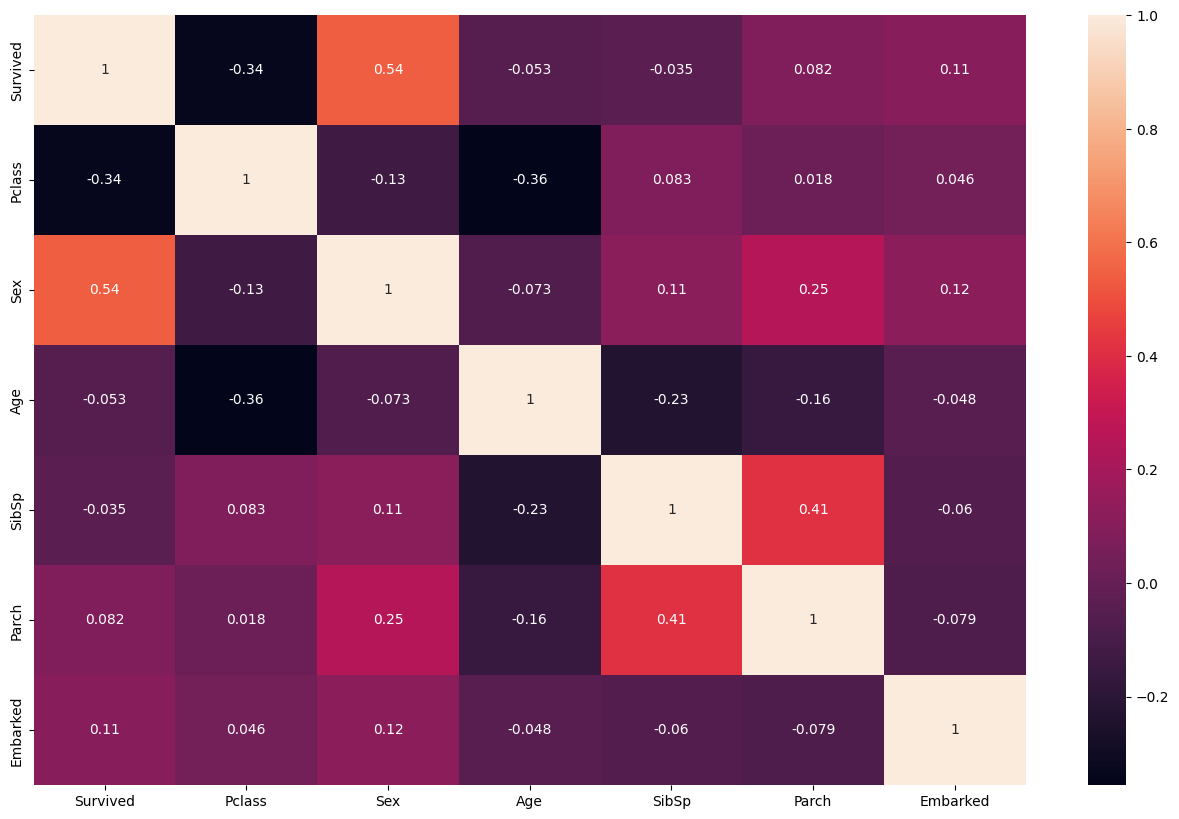

In [ ]:
plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
x=df.drop(columns=['Survived'])
y=df['Survived']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)

In [ ]:
y=y.values.reshape(-1,1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True,random_state=42)

In [ ]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.0,1,0,0
1,1,1,1,38.0,1,0,1
2,1,3,1,26.0,0,0,0
3,1,1,1,35.0,1,0,0
4,0,3,0,35.0,0,0,0
...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,0
887,1,1,1,19.0,0,0,0
888,0,3,1,24.0,1,2,0
889,1,1,0,26.0,0,0,1


<ipython-input-37-c9041330d739>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', palette="Blues_r", data=df)


<Axes: xlabel='Importance', ylabel='Feature'>

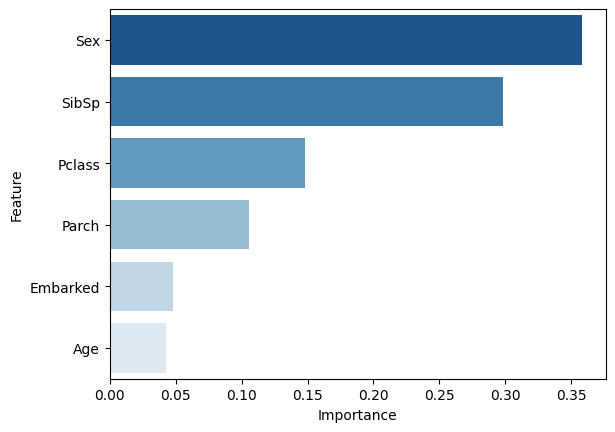

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

# Adjusted column names to match the number of columns in X_train
column_names = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked','Age']  # Removed 'Survived' assuming it's the target

# Convert NumPy array to DataFrame
z_copy = pd.DataFrame(X_train, columns=column_names)

# Assuming 'Survived' is the target and is part of a separate y_train array:
y = y_train  # make sure y_train is defined and contains the target variable 'Survived'

# X remains the same as z_copy since it now correctly represents feature columns
X = z_copy

# Train the decision tree model
model = DecisionTreeClassifier()
model.fit(X, y)
importances = model.feature_importances_

# Creating a DataFrame for feature importances
indices = np.argsort(importances)[::-1]
df = pd.DataFrame({'Feature': X.columns[indices], 'Importance': importances[indices]})

# Plotting feature importances
sns.barplot(x='Importance', y='Feature', palette="Blues_r", data=df)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
# The rest of your imports and setup can remain the same

from imblearn.over_sampling import SMOTE

from sklearn.neighbors import KNeighborsClassifier
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from xgboost import XGBClassifier
SMT=SMOTE()
scaler= StandardScaler()
QUAT = QuantileTransformer(random_state=5, output_distribution='normal')

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
Param = {
    'ada__n_estimators': [10, 25, 50, 75, 100, 125, 150, 175 , 200],
    'ada__learning_rate': [0.1, 0.5, 1.0],
}
p = Pipeline([('SMT', SMT),('scaler',scaler),('ada', ada)])
Grid=GridSearchCV(p,param_grid=Param,cv=5,scoring='recall')
Grid.fit(X_train,y_train)
print(Grid.best_score_)
print(Grid.best_params_)

0.7649196366177498
{'ada__learning_rate': 0.1, 'ada__n_estimators': 175}


In [ ]:
Final = AdaBoostClassifier(learning_rate= 0.5, n_estimators= 50)

Model = Pipeline([('SMT', SMT),('scaler',scaler), ('Final', Final)])
Model.fit(X_train, y_train)
Pred = Model.predict(X_test)

              precision    recall  f1-score   support

           0       0.86      0.78      0.82       105
           1       0.73      0.82      0.77        74

    accuracy                           0.80       179
   macro avg       0.79      0.80      0.80       179
weighted avg       0.81      0.80      0.80       179



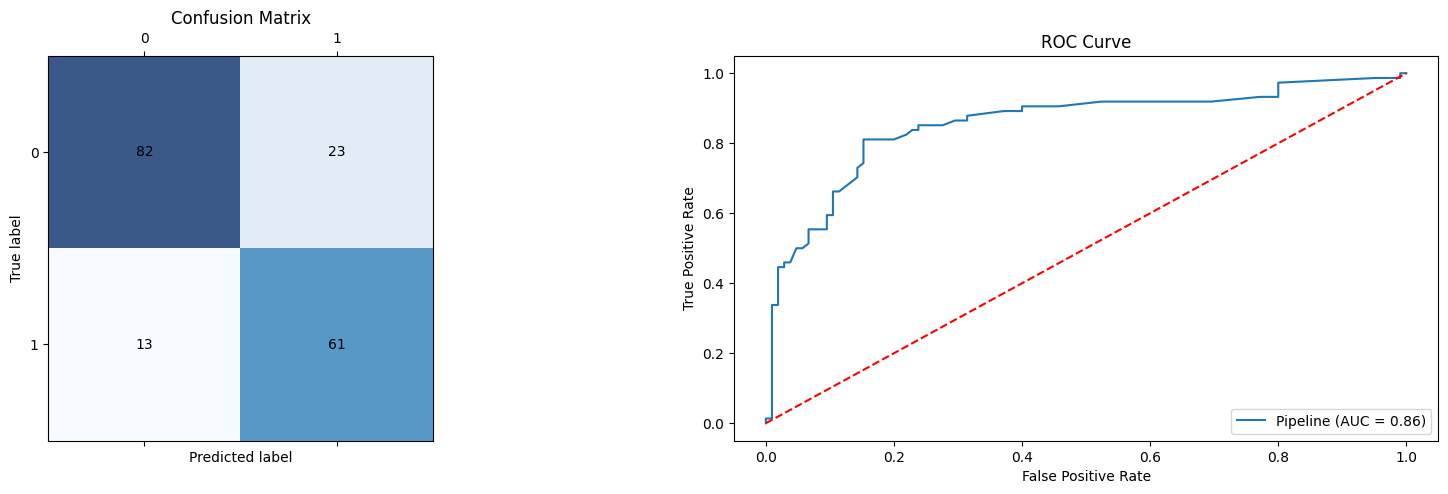

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, RocCurveDisplay

# Assuming y_test and Pred are defined, along with your model named Model and test dataset X_test, y_test
confusion = confusion_matrix(y_test, Pred)
print(classification_report(y_test, Pred))

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

# Plotting the confusion matrix
ax1.matshow(confusion, cmap='Blues', alpha=0.8)
for i in range(confusion.shape[0]):
    for j in range(confusion.shape[1]):
        ax1.text(x=j, y=i, s=confusion[i, j], va='center', ha='center')
ax1.set_xlabel('Predicted label')
ax1.set_ylabel('True label')
ax1.set_title('Confusion Matrix')

# Plotting the ROC curve using RocCurveDisplay
RocCurveDisplay.from_estimator(Model, X_test, y_test, ax=ax2)
ax2.plot([0, 1], [0, 1], linestyle='--', color='red')  # Reference line for no skill prediction
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve')

plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RANDOM_FOREST=RandomForestClassifier()
Param = {'RANDOM_FOREST__bootstrap': [True, False],
  'RANDOM_FOREST__max_depth': [10, 20, 30, None],
  'RANDOM_FOREST__n_estimators': [200, 600, 800]}
p = Pipeline([('SMT', SMT),('scaler',scaler),('RANDOM_FOREST', RANDOM_FOREST)])
Grid=GridSearchCV(p,param_grid=Param,cv=5,scoring='recall')
Grid.fit(X_train,y_train)
print(Grid.best_score_)
print(Grid.best_params_)

0.7608665269042627
{'RANDOM_FOREST__bootstrap': True, 'RANDOM_FOREST__max_depth': None, 'RANDOM_FOREST__n_estimators': 200}


In [ ]:
Final = RandomForestClassifier(bootstrap=True,n_estimators=600,max_depth=10)

Model = Pipeline([('SMT', SMT),('scaler',scaler), ('Final', Final)])
Model.fit(X_train, y_train)
Pred = Model.predict(X_test)

              precision    recall  f1-score   support

           0       0.83      0.90      0.87       105
           1       0.85      0.74      0.79        74

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



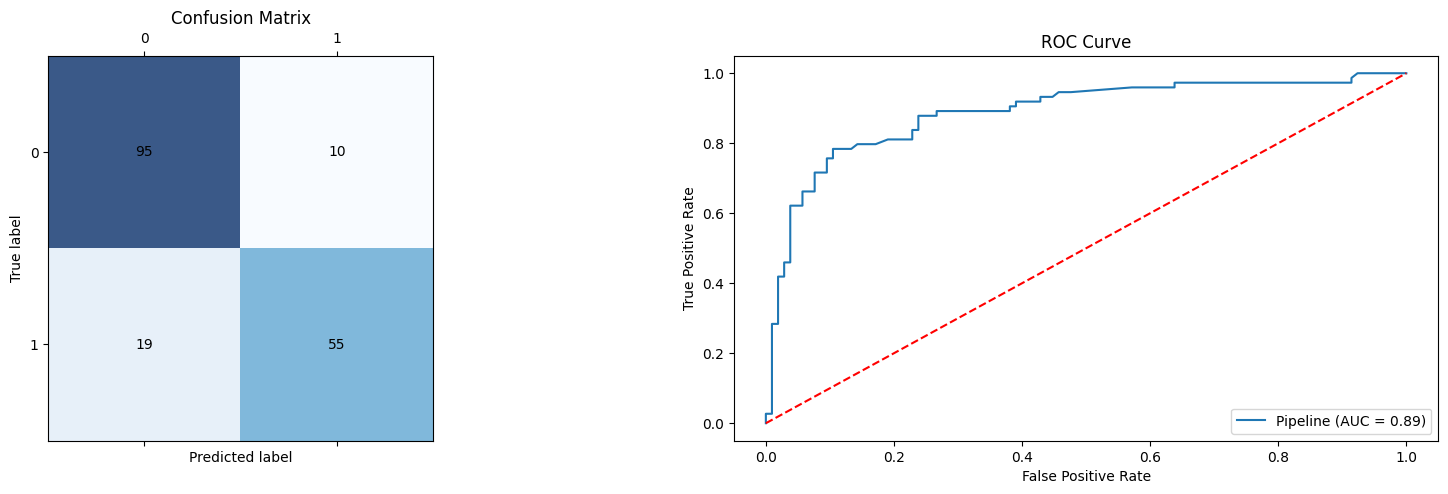

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, RocCurveDisplay

# Assuming 'Model', 'X_test', 'y_test', and 'Pred' are already defined.
confusion = confusion_matrix(y_test, Pred)
print(classification_report(y_test, Pred))

# Setup for plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

# Plotting the confusion matrix
ax1.matshow(confusion, cmap='Blues', alpha=0.8)
for i in range(confusion.shape[0]):
    for j in range(confusion.shape[1]):
        ax1.text(x=j, y=i, s=confusion[i, j], va='center', ha='center')
ax1.set_xlabel('Predicted label')
ax1.set_ylabel('True label')
ax1.set_title('Confusion Matrix')

# Plotting the ROC curve using RocCurveDisplay
RocCurveDisplay.from_estimator(Model, X_test, y_test, ax=ax2)
ax2.plot([0, 1], [0, 1], linestyle='--', color='red')
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve')

plt.show()


In [ ]:
KNN=KNeighborsClassifier()
lis = list(range(1,300))
Param = {'KNN__n_neighbors': lis}
p = Pipeline([('SMT', SMT),('QUAT',QUAT),('KNN', KNN)])
Grid=GridSearchCV(p,param_grid=Param,cv=5,scoring='recall')
Grid.fit(X_train,y_train)
print(Grid.best_score_)
print(Grid.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (710). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (710). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (710). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (710). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (712). 

0.7239692522711392
{'KNN__n_neighbors': 3}


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (710). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (710). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (710). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (710). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (712). 

In [ ]:
Final = KNeighborsClassifier(n_neighbors=59)

Model = Pipeline([('SMT', SMT),('QUAT',QUAT), ('Final', Final)])
Model.fit(X_train, y_train)
Pred = Model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (888). n_quantiles is set to n_samples.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



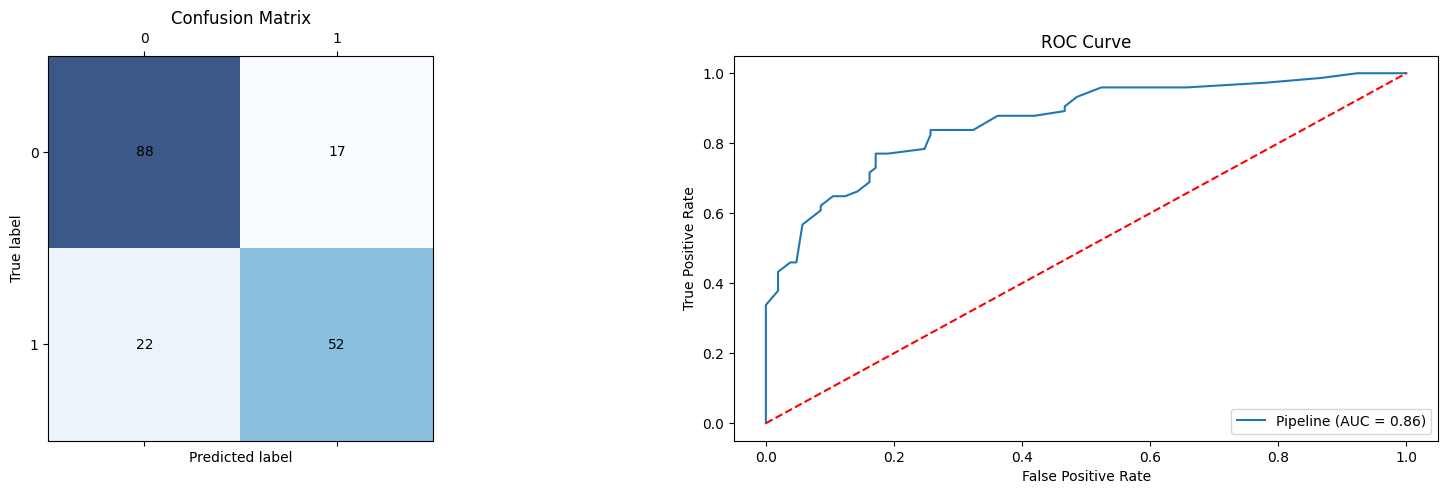

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, RocCurveDisplay

# Assuming 'Model', 'X_test', 'y_test', and 'Pred' are already defined.
confusion = confusion_matrix(y_test, Pred)
print(classification_report(y_test, Pred))

# Setup for plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

# Plotting the confusion matrix
ax1.matshow(confusion, cmap='Blues', alpha=0.8)
for i in range(confusion.shape[0]):
    for j in range(confusion.shape[1]):
        ax1.text(x=j, y=i, s=confusion[i, j], va='center', ha='center')
ax1.set_xlabel('Predicted label')
ax1.set_ylabel('True label')
ax1.set_title('Confusion Matrix')

# Plotting the ROC curve using RocCurveDisplay
RocCurveDisplay.from_estimator(Model, X_test, y_test, ax=ax2)
ax2.plot([0, 1], [0, 1], linestyle='--', color='red')
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve')

plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
LGR = LogisticRegression()

Param={"LGR__C":np.logspace(-3,3,7), "LGR__penalty":["l1","l2"]}

p = Pipeline([('SMT', SMT),('scaler',scaler),('LGR', LGR)])
Grid=GridSearchCV(p,param_grid=Param,cv=5,scoring='recall')
Grid.fit(X_train,y_train)
print(Grid.best_score_)
print(Grid.best_params_)

In [ ]:
Final = LogisticRegression(penalty='l2',C=0.1)

Model = Pipeline([('SMT', SMT),('scaler',scaler), ('Final', Final)])
Model.fit(X_train, y_train)
Pred = Model.predict(X_test)

In [ ]:
Dt=DecisionTreeClassifier()
Dt.fit(X_train,y_train)
Dt.score(X_train,y_train)
y_pred=Dt.predict(X_test)
print(accuracy_score(y_test,y_pred))

In [ ]:
!pip install lazypredict


In [ ]:
from sklearn.ensemble import VotingClassifier
ada = AdaBoostClassifier(learning_rate= 0.5, n_estimators= 50)
rf = RandomForestClassifier(bootstrap=True,n_estimators=600,max_depth=10)
knn = KNeighborsClassifier(n_neighbors=59)
LGR =LogisticRegression(penalty='l2',C=0.1)

X_train, y_train = SMT.fit_resample(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('ada', ada), ('rf', rf),('knn', knn)], voting='hard')
voting_clf.fit(X_train, y_train)

accuracy = voting_clf.score(X_test, y_test)
print('Voting classifier accuracy: {:.2f}'.format(accuracy))
Pred = voting_clf.predict(X_test)

In [ ]:
rf = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [10, 100,1000],
    'max_depth': [15,20,40,80,90],
    'max_features' :[0.5,1,2,3],
    'min_samples_split': [8, 10,12],
    'min_samples_leaf': [ 5,10,15],
    'criterion' : ['gini', 'entropy'],
    'bootstrap': [True]

}

rf_grid_model = GridSearchCV(rf, param_grid=param_grid_rf, cv=3, n_jobs=1, verbose=1)
rf_grid_model.fit(X_train, y_train)
print("Best Parameters: ", rf_grid_model.best_params_)
Best_RandomForest_Model = rf_grid_model.best_estimator_

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# Define the RandomForestClassifier and the parameter grid
rf = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [10, 100, 1000],
    'max_depth': [15, 20, 40, 80, 90],
    'max_features': [0.5, 1, 2, 3],
    'min_samples_split': [8, 10, 12],
    'min_samples_leaf': [5, 10, 15],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True]
}

# Set up the GridSearchCV object
rf_grid_model = GridSearchCV(rf, param_grid=param_grid_rf, cv=3, n_jobs=1, verbose=1)
rf_grid_model.fit(X_train, y_train)

# Retrieve the best parameters and best model
best_params = rf_grid_model.best_params_
Best_RandomForest_Model = rf_grid_model.best_estimator_

# Print the best parameters
print("Best Parameters: ", best_params)

# Evaluate the best model on the test data
y_pred = Best_RandomForest_Model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Save the model to disk
joblib.dump(Best_RandomForest_Model, 'optimized_random_forest_model.joblib')

# Example of loading the model (uncomment to use)
# loaded_rf_model = joblib.load('optimized_random_forest_model.joblib')

# Predict new data (example)
# new_data = [[feature1_value, feature2_value, ...]]  # Replace with actual values
# new_prediction = loaded_rf_model.predict(new_data)
# print("Prediction for new data:", new_prediction)


Fitting 3 folds for each of 1080 candidates, totalling 3240 fits
Best Parameters:  {'bootstrap': True, 'criterion': 'gini', 'max_depth': 20, 'max_features': 2, 'min_samples_leaf': 5, 'min_samples_split': 8, 'n_estimators': 100}
Accuracy: 0.8379888268156425
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       105
           1       0.82      0.78      0.80        74

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179

Confusion Matrix:
[[92 13]
 [16 58]]


['optimized_random_forest_model.joblib']